# Step-2 Details Instructions:
1.	List of variables selected for model built.
    * Unemployment rate
    * 10-year Treasury yield
    * Prime rate', 
    * 'House Price Index (Level)'
    * Unemployment rate_lag_1', 
    * 'Unemployment rate_lag_2
    * Log of (Dow Jones Total Stock Market Index (Level)),  
    * House Price Index (Level)_YOY
    * Mortgage rate.





2.	Correlation and Autocorrelation Requirements:

    *	For these nine variables create a correlation matrix and heatmap (table and graph). Multicollinearity for each variable, based on VIF values. 

    * Create a summary statistic, with number of observations, Mean, Std. Dev, Sum, Minimum and Maximum.

    * Autocorrelation and White Noise Test: Perform Augmented Dickey-Fuller Unit Root Test (Rho, Tau, F values) to highlight autocorrelation. You can also visually inspect the autocorrelation function plot or perform statistical tests such as the Ljung-Box test or the Durbin-Watson test to check for significant autocorrelation.

    * Exclude variables with negative results (you can send the results to me at this time if required to further narrow the list down).



3.	For the remaining variables built models,

    * I would recommend using the following (which I follow in SAS): GLIMMIX procedure in SAS, random effects (random residuals), binomial distribution, link equals logit.

    * You can try other alternatives (as part of step C), but please add comments on relevant code so that I can understand the applied methods.

    * model fit statistics should include AIC, BIC statistics and others ( I am assuming there is a command in Python which will generate all relevant one as there is in SAS). In-Sample Actual Default rate vs. Predicted default rate (curves).

    * Perform seven to eight iterations using different combinations, such as Unemployment rate, 10-year Treasury yield.

    * The results of each of these eight iterations, including the above-mentioned statistics and in-sample plots, should be added in the deliverable report.



4.	Final variables (3 variables tops) should be based on variable signs, statistical significance, In-Sample RMSE, and other model fit statistics (BIC and AIC) of the eight iterations performed in step-2 above.



5.	 Once the model is finalized we will perform out-of-sample testing in the next steps.



**Note: Deliver a separate HTML, and a .py and an IPYNB files for this step. Please don’t create this as an add-on to Step-1, instead a separate deliverable and files.**



In [25]:
import pandas as pd
import numpy as np


In [26]:

df_training  = pd.read_excel('Datasets/Modeling Data-V03.xlsx',sheet_name='training_data')
df_training['DRS-Target Variable'] = df_training['DRS-Target Variable']/100
df_testing  = pd.read_excel('Datasets/Modeling Data-V03.xlsx',sheet_name='testing_data')
df_testing['DRS-Target Variable'] = df_testing['DRS-Target Variable']/100


In [27]:
df_training

,Scenario Name,Date,DRS-Target Variable,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
0,Actual,2003 Q3,NaN,6.8,9.3,7.2,10.0,6.1,3.0,0.9,3.1,4.4,5.6,6.0,4.0,9649.7,138.7,150.6,22.7
1,Actual,2003 Q4,NaN,4.7,7.3,1.1,3.1,5.8,1.5,0.9,3.2,4.4,5.4,5.9,4.0,10799.6,143.1,148.3,21.1
2,Actual,2004 Q1,NaN,2.3,5.2,1.8,5.0,5.7,3.4,0.9,3.0,4.1,5.0,5.6,4.0,11039.4,148.1,154.9,21.6
3,Actual,2004 Q2,NaN,3.2,6.5,4.2,7.1,5.6,3.2,1.1,3.7,4.7,5.7,6.1,4.0,11144.6,153.9,164.2,20.0
4,Actual,2004 Q3,NaN,3.8,6.5,2.9,4.9,5.4,2.6,1.5,3.5,4.4,5.4,5.9,4.4,10893.8,159.3,175.4,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Actual,2018 Q4,0.0283,0.9,3.0,3.0,4.7,3.8,1.6,2.3,2.9,3.0,4.8,4.8,5.3,25724.5,205.4,276.9,36.1
62,Actual,2019 Q1,0.0269,2.4,3.7,3.6,4.1,3.9,0.7,2.4,2.5,2.7,4.5,4.4,5.5,29193.9,207.3,283.1,25.5
63,Actual,2019 Q2,0.0260,3.2,5.6,-1.4,1.3,3.6,3.5,2.3,2.1,2.4,4.0,4.0,5.5,30243.8,209.2,296.4,20.6
64,Actual,2019 Q3,0.0244,2.8,4.1,2.3,3.4,3.6,1.3,2.0,1.7,1.8,3.4,3.7,5.3,30441.8,211.3,304.9,24.6


# Proprocessing

In [28]:
def transformation(df,training=True,testing=True):
    # Step 2: Perform data transformation - Log Transformation
    #  Defines a list called Defines a list called log_transform_variables 
    # that contains the names of variables to be log-transformed.

    log_transform_variables = ['Dow Jones Total Stock Market Index (Level)',
                                'House Price Index (Level)',
                                'Commercial Real Estate Price Index (Level)']

    # Loop through the variables to be log-transformed
    # Applies the natural logarithm (np.log()) to the selected variable.
    # Creates a new column with the log-transformed values using
    for var in log_transform_variables:
        # Apply the natural logarithm to the selected variable and create a new column with the log-transformed values
        df[f'log_{var}'] = np.log(df[var])

    # Step 3: Perform data transformation - Year-over-Year Change
    # Defines a list called yoy_change_variables that contains the names
    # of variables for which year-over-year changes will be calculated
    yoy_change_variables = ['Dow Jones Total Stock Market Index (Level)',
                            'House Price Index (Level)',
                            'Commercial Real Estate Price Index (Level)']

    # Loop through the variables for year-over-year change calculation
    for var in yoy_change_variables:
        # Calculate the percentage change over a four-quarter period (assuming quarterly data)
        # Creates a new column with the year-over-year change values using
        df[f'{var}_YOY'] = df[var].pct_change(3) * 100

    # Step 4: Perform data transformation - Lags/Leads
    # Defines the range of lags to be considered for lag/lead transformation.
    lags = range(1, 7)  # Lags of up to six quarters
    # Defines a list called lag_lead_variables that contains the names of variables for which lagged values will be created
    lag_lead_variables = ['Unemployment rate', '10-year Treasury yield', 'Mortgage rate']

    # Loop through the variables for lag/lead transformation
    # Loop through the variables for lag/lead transformation
    for var in lag_lead_variables:
        # Loop through the specified lags
        for lag in lags:
            # Shift the variable values by the specified lag and create new columns with lagged values
            # Shifts the variable values by the specified lag using 
            df[f'{var}_lag_{lag}'] = df[var].shift(lag)


    # this code will save the transformed data into csv file in the current directory
    if training is True:
        df.to_csv('training-transformed_dataset.csv',index=False)
    if testing is True:
        df = df.iloc[6:]
        df.to_csv('testing-transformed_dataset.csv',index=False)
        
    return df

input_data = transformation(df_training,training=True)
testing_data = transformation(df_testing,testing=True)

print('shape of input Data :{}'.format(input_data.shape))
print('shape of test Data :{}'.format(testing_data.shape))

shape of input Data :(60, 43)
shape of test Data :(8, 43)


In [29]:
input_data.head()

,Scenario Name,Date,DRS-Target Variable,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,...,10-year Treasury yield_lag_3,10-year Treasury yield_lag_4,10-year Treasury yield_lag_5,10-year Treasury yield_lag_6,Mortgage rate_lag_1,Mortgage rate_lag_2,Mortgage rate_lag_3,Mortgage rate_lag_4,Mortgage rate_lag_5,Mortgage rate_lag_6
6,Actual,2005 Q1,0.0142,4.5,7.9,-4.8,-2.5,5.3,2.0,2.5,...,4.7,4.1,4.4,4.4,5.7,5.9,6.1,5.6,5.9,6.0
7,Actual,2005 Q2,0.0155,2.0,5.0,3.9,6.6,5.1,2.7,2.9,...,4.4,4.7,4.1,4.4,5.8,5.7,5.9,6.1,5.6,5.9
8,Actual,2005 Q3,0.0159,3.2,7.0,1.7,6.1,5.0,6.2,3.4,...,4.3,4.4,4.7,4.1,5.7,5.8,5.7,5.9,6.1,5.6
9,Actual,2005 Q4,0.0164,2.3,5.6,3.4,6.7,5.0,3.8,3.8,...,4.4,4.3,4.4,4.7,5.8,5.7,5.8,5.7,5.9,6.1
10,Actual,2006 Q1,0.0160,5.5,8.5,8.3,10.6,4.7,2.1,4.4,...,4.2,4.4,4.3,4.4,6.2,5.8,5.7,5.8,5.7,5.9


In [30]:
testing_data.head()

,Scenario Name,Date,DRS-Target Variable,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,...,10-year Treasury yield_lag_3,10-year Treasury yield_lag_4,10-year Treasury yield_lag_5,10-year Treasury yield_lag_6,Mortgage rate_lag_1,Mortgage rate_lag_2,Mortgage rate_lag_3,Mortgage rate_lag_4,Mortgage rate_lag_5,Mortgage rate_lag_6
6,Actual,2020 Q1,0.0235,-5.1,-3.9,3.0,4.3,3.8,1.0,1.1,...,2.4,2.7,3.0,2.9,3.7,3.7,4.0,4.4,4.8,4.6
7,Actual,2020 Q2,0.0254,-31.2,-32.4,48.5,46.1,13.0,-3.1,0.1,...,1.8,2.4,2.7,3.0,3.5,3.7,3.7,4.0,4.4,4.8
8,Actual,2020 Q3,0.0284,33.8,38.7,-16.6,-13.6,8.8,4.7,0.1,...,1.8,1.8,2.4,2.7,3.2,3.5,3.7,3.7,4.0,4.4
9,Actual,2020 Q4,0.0274,4.5,6.6,-8.3,-6.9,6.8,2.4,0.1,...,1.4,1.8,1.8,2.4,3.0,3.2,3.5,3.7,3.7,4.0
10,Actual,2021 Q1,0.0267,6.3,10.9,54.7,60.6,6.2,3.7,0.1,...,0.7,1.4,1.8,1.8,2.8,3.0,3.2,3.5,3.7,3.7


## Transformation

In [31]:
def select_features(df):
    interested_features = [
                        'DRS-Target Variable',
                        '10-year Treasury yield',
                        'Prime rate','House Price Index (Level)',
                        'Unemployment rate_lag_1', 
                        'Unemployment rate_lag_2',
                        'log_Dow Jones Total Stock Market Index (Level)',  
                        'House Price Index (Level)_YOY',
                        'Mortgage rate',
                        ]
    
    df = df[interested_features]
    return df
    

In [32]:
interested_features = [
                        'DRS-Target Variable',
                        '10-year Treasury yield',
                        'Prime rate','House Price Index (Level)',
                        'Unemployment rate_lag_1', 
                        'Unemployment rate_lag_2',
                        'log_Dow Jones Total Stock Market Index (Level)',  
                        'House Price Index (Level)_YOY',
                        'Mortgage rate',
                        ]

training_data = select_features(input_data)
testing_data = select_features(testing_data)



# Step-2
 1. For these nine variables create a correlation matrix and heatmap (table and graph). Multicollinearity for each variable, based on VIF values.

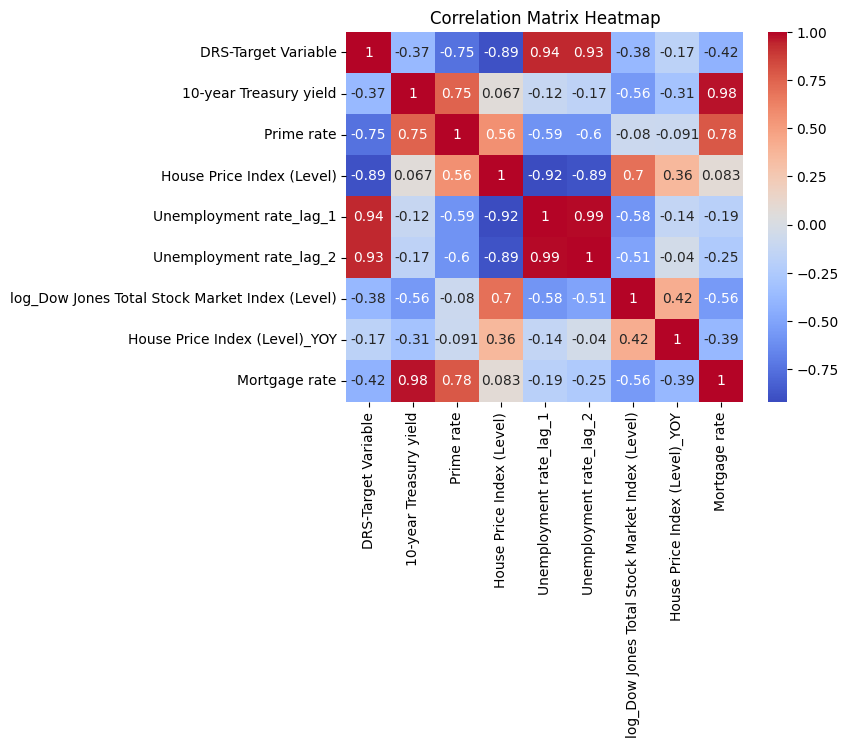

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# This line calculates the correlation matrix of the df_transformed_training DataFrame.
# The correlation matrix is a square matrix that shows the correlation coefficients between pairs of variables.
# It provides a measure of the linear relationship between variables
correlation_matrix = training_data.corr()

# This line creates a heatmap using the Seaborn library. 
# The heatmap() function is used to plot the correlation matrix as a color-encoded rectangular grid. 
# The correlation_matrix is passed as the input data. The annot=True parameter adds numeric values to each cell of the heatmap,
# representing the correlation coefficients. The cmap='coolwarm' parameter sets the color palette for the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# This line sets the title of the plot to 'Correlation Matrix Heatmap' 
# using the title() function from the Matplotlib library
plt.title('Correlation Matrix Heatmap')
plt.show()

# Summary
# Given Code : calculates the correlation matrix for a given DataFrame and visualizes it as a heatmap using Seaborn.
# The heatmap provides a visual representation of the correlation between variables, 
# with higher correlation values shown in warmer colors and lower correlation values shown in cooler colors


In [34]:
# This line imports the variance_inflation_factor function
# from the statsmodels.stats.outliers_influence module.
# This function is used to calculate the variance inflation factor, 
# which is a measure of multicollinearity between variables in a regression model
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame to store the VIF values
# this line creates an empty DataFrame called vif_data to store 
# the variable names and their corresponding VIF values
vif_data = pd.DataFrame()

# This line assigns the column names of the df_transformed_
# training DataFrame to the 'Variable' column in the vif_data 
# DataFrame. This will store the names of the variables for
# which VIF values are calculated.
predictors_df = training_data.iloc[:,1:]
vif_data['Variable'] = predictors_df.columns


# This line calculates the VIF values for each variable
# in the df_transformed_training DataFrame and 
# assigns them to the 'VIF' column in the vif_data DataFrame.
# The VIF values are computed using a list comprehension, 
# where variance_inflation_factor is applied to each column of the 
# df_transformed_training DataFrame using the range() function
vif_data['VIF'] = [variance_inflation_factor(predictors_df.values, i) for i in range(predictors_df.shape[1])]


vif_data

# summary, 
# Given code calculates the VIF values for each variable in the df_transformed_training DataFrame. 
# The VIF values indicate the degree of multicollinearity between variables, 
# with higher values indicating stronger multicollinearity. 
# The results are stored in a DataFrame called vif_data and 
# then printed to the console.


,Variable,VIF
0,10-year Treasury yield,399.922084
1,Prime rate,84.061378
2,House Price Index (Level),1584.041360
3,Unemployment rate_lag_1,721.293720
4,Unemployment rate_lag_2,846.707158
5,log_Dow Jones Total Stock Market Index (Level),2915.691100
6,House Price Index (Level)_YOY,3.165315
7,Mortgage rate,1066.915484


In [35]:
updated_predictor = predictors_df.drop('House Price Index (Level)',axis=1)
updated_predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = updated_predictor.columns
vif_data['VIF'] = [variance_inflation_factor(updated_predictor.values, i) for i in range(updated_predictor.shape[1])]
vif_data

,Variable,VIF
0,10-year Treasury yield,283.130443
1,Prime rate,56.900745
2,Unemployment rate_lag_1,715.184761
3,Unemployment rate_lag_2,660.174255
4,log_Dow Jones Total Stock Market Index (Level),141.840967
5,House Price Index (Level)_YOY,2.193561
6,Mortgage rate,730.413548


In [36]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the specified columns from the predictors_df
columns_to_drop = ['House Price Index (Level)', 'log_Dow Jones Total Stock Market Index (Level)']
updated_predictor = predictors_df.drop(columns_to_drop, axis=1)

# Calculate VIF for each variable in updated_predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = updated_predictor.columns
vif_data['VIF'] = [variance_inflation_factor(updated_predictor.values, i) for i in range(updated_predictor.shape[1])]

# Print the VIF data
print(vif_data)


                        Variable         VIF
0         10-year Treasury yield   76.471166
1                     Prime rate   55.752033
2        Unemployment rate_lag_1  707.548535
3        Unemployment rate_lag_2  659.654433
4  House Price Index (Level)_YOY    1.621184
5                  Mortgage rate  210.897864


In [37]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the specified columns from the predictors_df
columns_to_drop = ['Unemployment rate_lag_2', 'House Price Index (Level)', 'log_Dow Jones Total Stock Market Index (Level)']
updated_predictor = predictors_df.drop(columns_to_drop, axis=1)

# Calculate VIF for each variable in updated_predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = updated_predictor.columns
vif_data['VIF'] = [variance_inflation_factor(updated_predictor.values, i) for i in range(updated_predictor.shape[1])]

# Print the VIF data
print(vif_data)


                        Variable         VIF
0         10-year Treasury yield   73.295917
1                     Prime rate   50.581024
2        Unemployment rate_lag_1   18.334385
3  House Price Index (Level)_YOY    1.252499
4                  Mortgage rate  209.631747


In [38]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the specified columns from the predictors_df
columns_to_drop = ['10-year Treasury yield','Unemployment rate_lag_2', 'House Price Index (Level)', 'log_Dow Jones Total Stock Market Index (Level)']
updated_predictor = predictors_df.drop(columns_to_drop, axis=1)

# Calculate VIF for each variable in updated_predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = updated_predictor.columns
vif_data['VIF'] = [variance_inflation_factor(updated_predictor.values, i) for i in range(updated_predictor.shape[1])]

# Print the VIF data
print(vif_data)


                        Variable         VIF
0                     Prime rate   50.164525
1        Unemployment rate_lag_1   16.291920
2  House Price Index (Level)_YOY    1.236072
3                  Mortgage rate  100.307276


In [39]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the specified columns from the predictors_df
columns_to_drop = ['Mortgage rate','10-year Treasury yield','Unemployment rate_lag_2', 'House Price Index (Level)', 'log_Dow Jones Total Stock Market Index (Level)']
updated_predictor = predictors_df.drop(columns_to_drop, axis=1)

# Calculate VIF for each variable in updated_predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = updated_predictor.columns
vif_data['VIF'] = [variance_inflation_factor(updated_predictor.values, i) for i in range(updated_predictor.shape[1])]

# Print the VIF data
print(vif_data)


                        Variable       VIF
0                     Prime rate  3.294323
1        Unemployment rate_lag_1  3.285024
2  House Price Index (Level)_YOY  1.051726



Autocorrelation - Augmented Dickey-Fuller Test Results:

Variable: DRS-Target Variable
ADF Statistic                  -2.692612
p-value                         0.075325
# Lags Used                     4.000000
Number of Observations Used    55.000000
dtype: float64

Variable: 10-year Treasury yield
ADF Statistic                  -1.184460
p-value                         0.680245
# Lags Used                     2.000000
Number of Observations Used    57.000000
dtype: float64

Variable: Prime rate
ADF Statistic                  -3.469074
p-value                         0.008818
# Lags Used                     3.000000
Number of Observations Used    56.000000
dtype: float64

Variable: House Price Index (Level)
ADF Statistic                  -0.884130
p-value                         0.793154
# Lags Used                     5.000000
Number of Observations Used    54.000000
dtype: float64

Variable: Unemployment rate_lag_1
ADF Statistic                  -1.546206
p-value                    

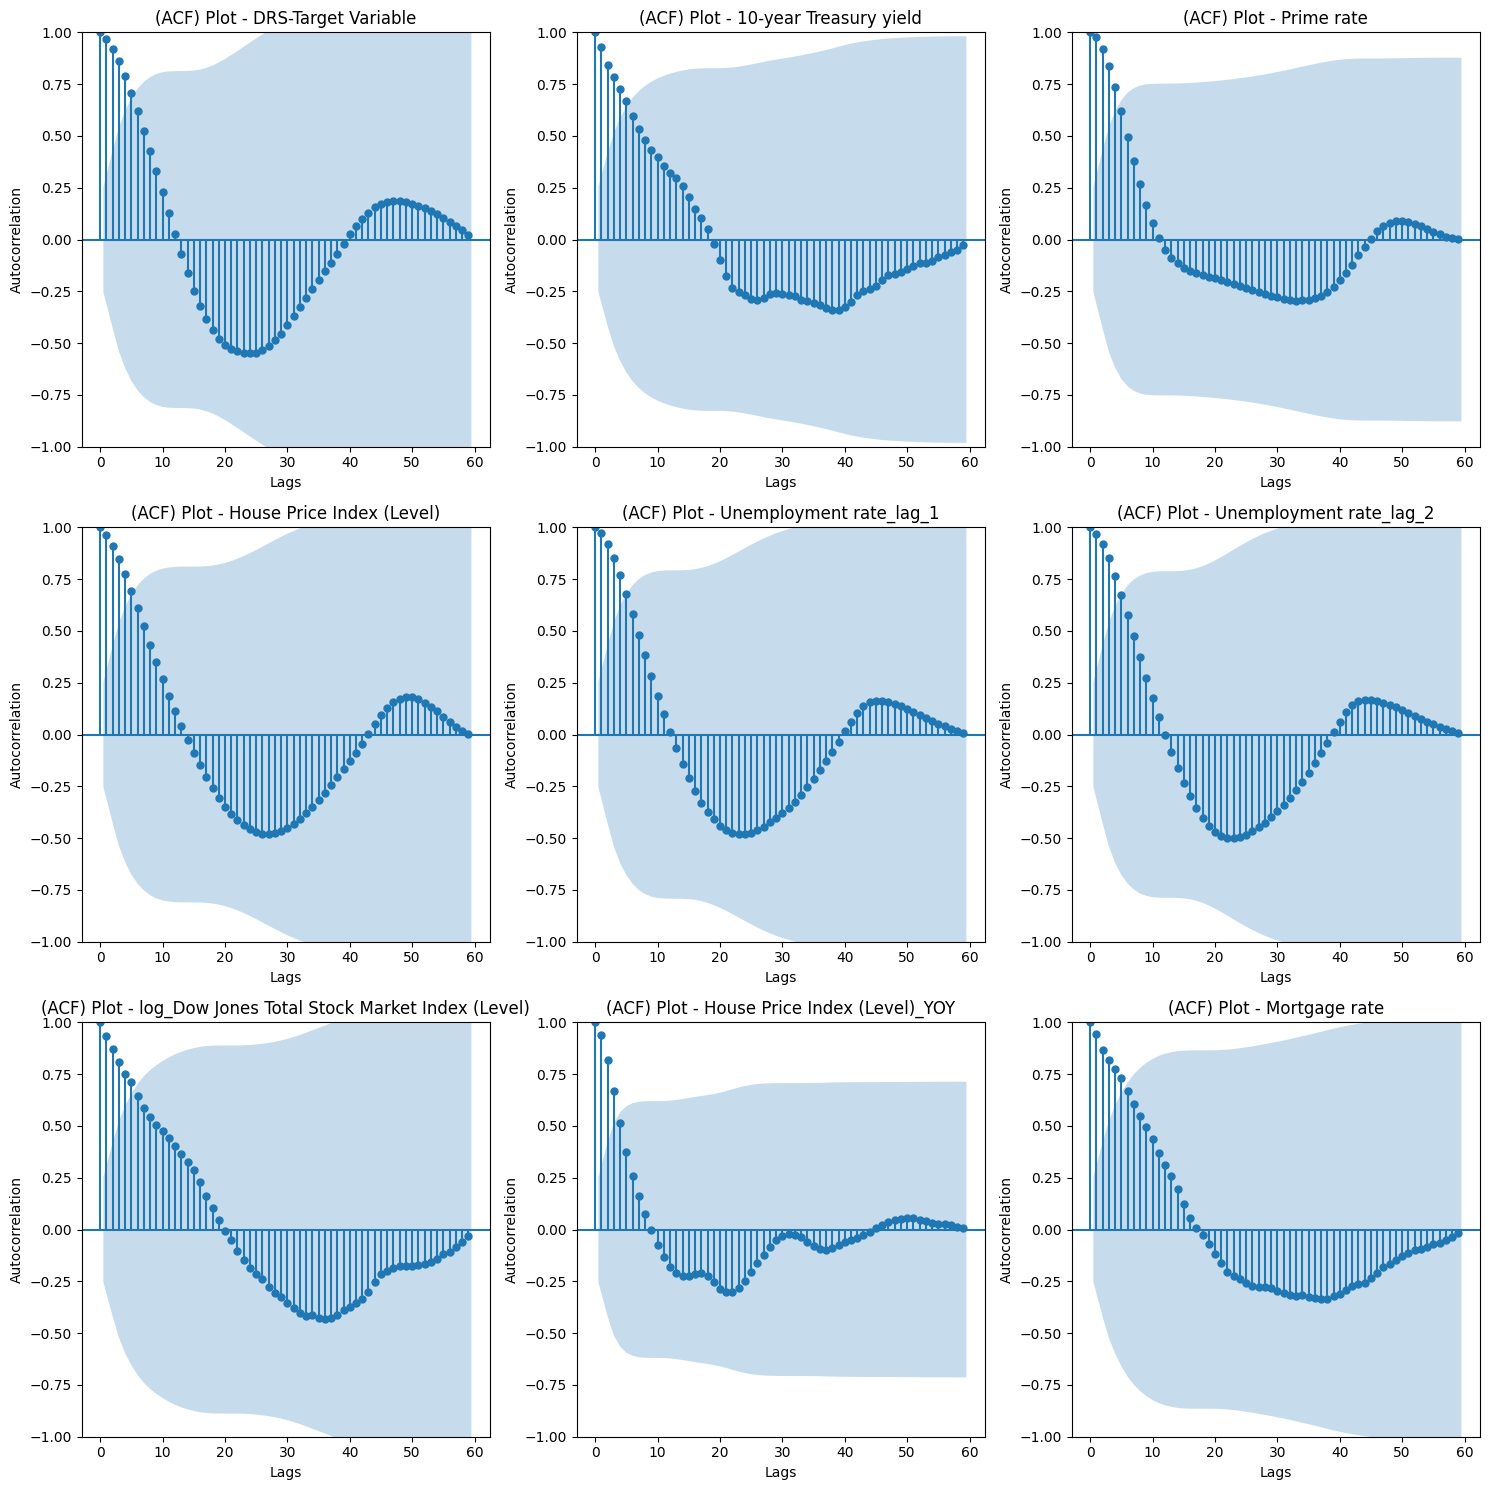

In [40]:
import statsmodels.api as sm

# Perform Augmented Dickey-Fuller test for autocorrelation on each variable
# This line initializes an empty dictionary adf_results that will store the 
# results of the Augmented Dickey-Fuller (ADF) test for each variable.
adf_results = {}

#  This loop iterates over each column in the df DataFrame.
for column in training_data.columns:
    # his line performs the ADF test using the sm.tsa.stattools.adfuller() function from the statsmodels library. It calculates the ADF statistic, p-value, number of lags used, and number of observations used for the variable column
    adf_test = sm.tsa.stattools.adfuller(training_data[column])
    #This line creates a pandas Series with the ADF test results and assigns it to the adf_results dictionary using the variable column as the key. The Series is indexed with labels ['ADF Statistic', 'p-value', '# Lags Used', 'Number of Observations Used'].
    adf_results[column] = pd.Series(adf_test[:4], index=['ADF Statistic', 'p-value', '# Lags Used', 'Number of Observations Used'])

# Display the ADF test results for each variable
print("\nAutocorrelation - Augmented Dickey-Fuller Test Results:")

# This loop iterates over each key-value pair in the adf_results dictionary.
for column, results in adf_results.items():
    # This line prints the name of the variable being analyzed
    print("\nVariable:", column)
    # This line prints the ADF test results for the variable. The results variable contains the Series with the ADF statistic, 
    # p-value, number of lags used, and number of observations used
    print(results)

# Visualize autocorrelation function (ACF) plot for each variable

# This line calculates the number of variables in the DataFrame.
num_variables = len(training_data.columns)
# This line sets the number of columns for the subplots to be displayed
num_cols = 3  # Set the number of columns for subplots

# This line calculates the number of rows needed for the subplots based on the number of variables and columns
num_rows = (num_variables + num_cols - 1) // num_cols
#  This line creates a figure and axes for the subplots, with the specified number of rows and columns. 
# The figsize parameter determines the size of the figure.
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))


# The following loop iterates over each variable in the DataFrame and plots the autocorrelation function (ACF) for that variable
for i, column in enumerate(training_data.columns):
    # This line calculates the row index for the subplot based on the current iteration index
    row = i // num_cols
    # : This line calculates the column index for the subplot based on the current iteration index.
    col = i % num_cols
    # This line selects the current subplot for plotting.
    ax = axes[row, col]
    
    #  This line plots the autocorrelation function (ACF) for the variable column using the sm.graphics.tsa.plot_acf() function from the statsmodels library. The lags parameter determines the number of lags to include in the plot
    sm.graphics.tsa.plot_acf(training_data[column], lags=len(training_data[column])-1, ax=ax)
    # This line sets the title of the subplo
    ax.set_title("(ACF) Plot - " + column)
    # This line sets the label
    ax.set_xlabel("Lags")
    ax.set_ylabel("Autocorrelation")

# This line adjusts the layout of the subplots to prevent overlapping
plt.tight_layout()
# This line displays the subplots.
plt.show()
# In summary, this code performs the Augmented Dickey-Fuller (ADF) test for autocorrelation on each variable in the df DataFrame. It prints the ADF test results and visualizes the autocorrelation function (ACF) plot for each variable.

In [41]:

# Calculate summary statistics
summary_stats = training_data.describe().transpose()

# Display the summary statistics
print("\nSummary Statistics:")
summary_stats



Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
DRS-Target Variable,60.0,0.058122,0.033367,0.014200,0.028000,0.049450,0.093600,0.114800
10-year Treasury yield,60.0,3.066667,1.040806,1.600000,2.200000,2.800000,3.900000,5.200000
Prime rate,60.0,4.546667,1.674481,3.300000,3.300000,3.500000,5.325000,8.300000
House Price Index (Level),60.0,168.996667,24.676764,133.400000,142.775000,171.350000,190.225000,214.100000
Unemployment rate_lag_1,60.0,6.131667,1.969642,3.600000,4.600000,5.300000,7.850000,9.900000
Unemployment rate_lag_2,60.0,6.161667,1.943969,3.600000,4.675000,5.350000,7.850000,9.900000
log_Dow Jones Total Stock Market Index (Level),60.0,9.726728,0.353813,8.992707,9.469948,9.617690,9.982763,10.405335
House Price Index (Level)_YOY,60.0,1.605091,5.982292,-13.422007,-1.425234,3.588308,4.408165,12.241055
Mortgage rate,60.0,4.708333,0.989486,3.400000,3.900000,4.400000,5.725000,6.600000


# Modeling the Data

In [42]:
columns_to_drop = ['Unemployment rate_lag_2', 'House Price Index (Level)', 'log_Dow Jones Total Stock Market Index (Level)']
training_data.drop(columns_to_drop,axis=1,inplace=True)
training_data.head(5)

/tmp/ipykernel_20519/1020528254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.drop(columns_to_drop,axis=1,inplace=True)


,DRS-Target Variable,10-year Treasury yield,Prime rate,Unemployment rate_lag_1,House Price Index (Level)_YOY,Mortgage rate
6,0.0142,4.4,5.4,5.4,11.695906,5.8
7,0.0155,4.2,5.9,5.3,12.241055,5.7
8,0.0159,4.3,6.4,5.1,12.053301,5.8
9,0.0164,4.6,7.0,5.0,10.645724,6.2
10,0.0160,4.7,7.4,5.0,7.997763,6.2


In [43]:
columns_to_drop = ['Unemployment rate_lag_2', 'House Price Index (Level)', 'log_Dow Jones Total Stock Market Index (Level)']
testing_data.drop(columns_to_drop,axis=1,inplace=True)
testing_data.head(5)

,DRS-Target Variable,10-year Treasury yield,Prime rate,Unemployment rate_lag_1,House Price Index (Level)_YOY,Mortgage rate
6,0.0235,1.4,4.4,3.6,3.776291,3.5
7,0.0254,0.7,3.3,3.8,3.928064,3.2
8,0.0284,0.6,3.3,13.0,5.184493,3.0
9,0.0274,0.9,3.3,8.8,7.185629,2.8
10,0.0267,1.4,3.3,6.8,10.291439,2.9


**Family Functions**:

* sm.families.Binomial(): Binomial family for binary response data.
* sm.families.Gaussian(): Gaussian family for continuous response data.
* sm.families.Poisson(): Poisson family for count data.
* sm.families.NegativeBinomial(): Negative binomial family for count data.
* sm.families.Gamma(): Gamma family for continuous positive response data.
* sm.families.InverseGaussian(): Inverse Gaussian family for continuous positive response data.

**Link Functions**:

* sm.families.links.logit(): Logit link function for binary response data.
* sm.families.links.identity(): Identity link function for continuous response data.
* sm.families.links.log() or sm.families.links.log1p(): Log link function for count data (Poisson, Negative Binomial).
* sm.families.links.inverse_power(): Inverse power link function for Gamma and Inverse Gaussian families.  

In addition to these options, statsmodels also provides support for custom family and link functions. ]

# Summary interpretations
To interpret the results of the GLM model, you can analyze various aspects of the model summary. Here are some key points to consider:

1. Coefficients: The coefficients indicate the estimated effect of each predictor on the response variable. They represent the average change in the response for a one-unit increase in the predictor, assuming all other predictors are held constant. For example, if the coefficient for "Prime rate" is 0.2, it suggests that, on average, a one-unit increase in the "Prime rate" is associated with a 0.2 increase in the "DRS-Target Variable."

2. Standard Errors: The standard errors provide an estimate of the variability or uncertainty associated with the coefficient estimates. Smaller standard errors indicate more precise estimates. In hypothesis testing, the standard errors are used to calculate t-statistics and p-values.

3. P-values: The p-values associated with the coefficients indicate the statistical significance of each predictor. They indicate the probability of observing a coefficient as extreme as the estimated coefficient if the null hypothesis (no effect) were true. Typically, a p-value below a certain threshold (e.g., 0.05) is considered statistically significant, suggesting a significant relationship between the predictor and the response.

4. AIC and BIC: The Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) are measures of model fit that balance goodness of fit and model complexity. Lower AIC and BIC values indicate better-fitting models. You can compare the AIC and BIC values of different models to assess their relative quality.

Based on the provided code, you can examine the model summary output, including the coefficients, standard errors, p-values, AIC, and BIC. Interpretation of the coefficients depends on the specific dataset and context of your analysis. Remember to consider the scale and context of your variables when interpreting the coefficient values.

In [44]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
# data = pd.DataFrame({
#     'DRS-Target Variable': [1.42, 1.55, 1.59, 1.64, 1.60],
#     'Prime rate': [5.4, 5.9, 6.4, 7.0, 7.4],
#     'Unemployment rate_lag_1': [5.4, 5.3, 5.1, 5.0, 5.0],
#     'House Price Index (Level)_YOY': [11.695906, 12.241055, 12.053301, 10.645724, 7.997763]
# })
# df_training = data
# Define the predictors and response variable
predictors = ['Prime rate','Unemployment rate_lag_1', 'House Price Index (Level)_YOY','Mortgage rate']
response = 'DRS-Target Variable'


# Fit the GLM model
# 1 -sm.families.Gamma(sm.families.links.log())
# 2- sm.families.Gaussian(sm.families.links.identity())

model_1 = sm.GLM(training_data[response], sm.add_constant(training_data[predictors]), family=sm.families.Gamma(sm.families.links.log()))
result_1 = model_1.fit()

# Fit the GLM with Gaussian family and identity link
model_2 = sm.GLM(training_data[response], sm.add_constant(training_data[predictors]), family=sm.families.Gaussian(sm.families.links.identity()))
result_2 = model_2.fit()

# Fit the GLM with Tweedie family and appropriate link
model_3 = sm.GLM(training_data[response], sm.add_constant(training_data[predictors]), family=sm.families.Tweedie(var_power=1.5, link=sm.families.links.Log()))
result_3 = model_3.fit()

# Fit the GLM with Tweedie family and appropriate link
model_4 = sm.GLM(training_data[response], sm.add_constant(training_data[predictors]), family=sm.families.Binomial( link=sm.families.links.logit()))
result_4 = model_4.fit()



print('Summary of Model-1 : {}'.format(result_1.summary()))
print('Summary of Model-2 : {}'.format(result_2.summary()))
print('Summary of Model-3 : {}'.format(result_3.summary()))
print('Summary of Model-4 : {}'.format(result_4.summary()))


print('AIC : {} and BIC : {} of Model-{}'.format(result_1.aic ,result_1.bic,1  ))
print('AIC : {} and BIC : {} of Model-{}'.format(result_2.aic ,result_2.bic,2  ))
print('AIC : {} and BIC : {} of Model-{}'.format(result_3.aic ,result_3.bic,3  ))
print('AIC : {} and BIC : {} of Model-{}'.format(result_4.aic ,result_4.bic,4 ))



/home/iffi/anaconda3/envs/sep_darts_2/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/home/iffi/anaconda3/envs/sep_darts_2/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/home/iffi/anaconda3/envs/sep_darts_2/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


Summary of Model-1 :                   Generalized Linear Model Regression Results                  
Dep. Variable:     DRS-Target Variable   No. Observations:                   60
Model:                             GLM   Df Residuals:                       55
Model Family:                    Gamma   Df Model:                            4
Link Function:                     log   Scale:                        0.025471
Method:                           IRLS   Log-Likelihood:                 208.89
Date:                 Sat, 10 Jun 2023   Deviance:                       1.4389
Time:                         12:45:37   Pearson chi2:                     1.40
No. Iterations:                     13   Pseudo R-squ. (CS):              1.000
Covariance Type:             nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

/home/iffi/anaconda3/envs/sep_darts_2/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1838: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


# In-Sampling Evaluations

Family_Gamma_log
MSE: 0.00010658980347289853
RMSE: 0.010324233795923964
MAE 0.007341419149024233


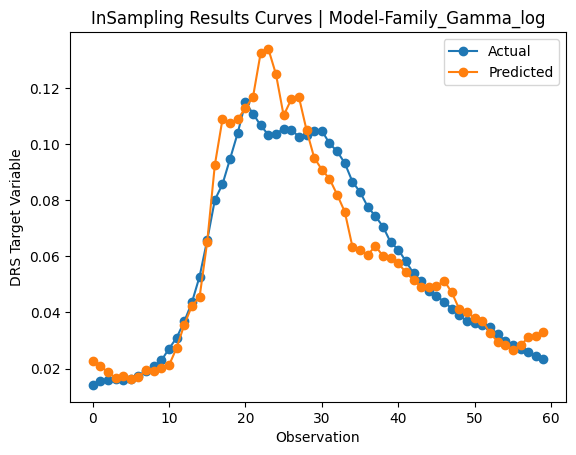

Family_Gaussian_identity
MSE: 3.368882881928603e-05
RMSE: 0.0058042078545901534
MAE 0.004759219320465291


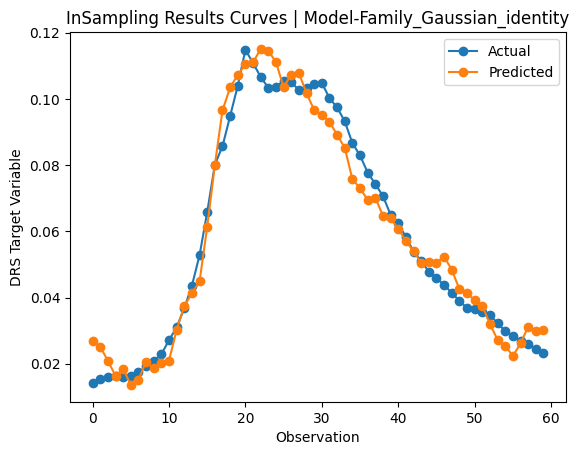

Family_Tweedie_log
MSE: 8.003413189558557e-05
RMSE: 0.008946179737496087
MAE 0.006740172109786416


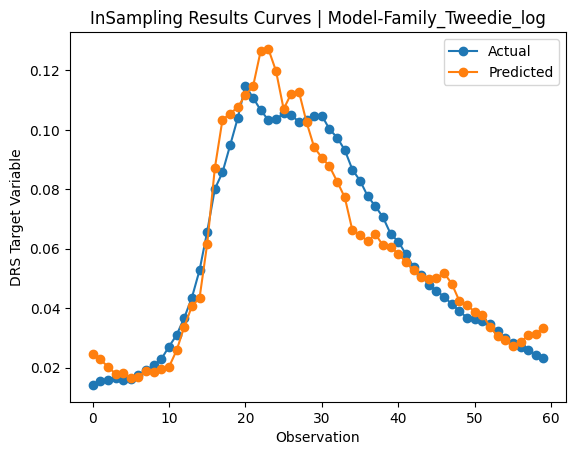

Family_Bionomail_logit
MSE: 6.148077868889466e-05
RMSE: 0.007840967968873146
MAE 0.006219299311077302


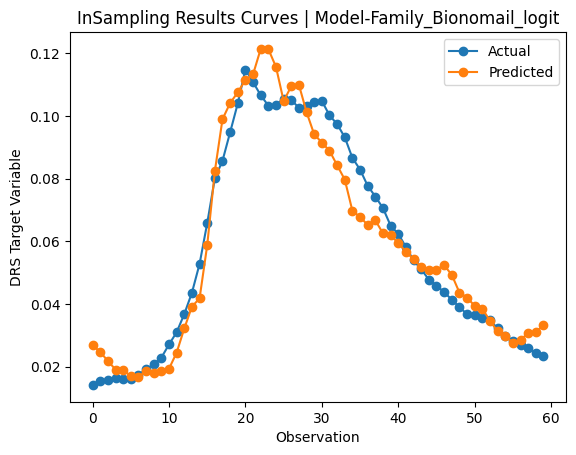

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def Evaluation(df,predictors,response,fitted_model_list):
    
    for model_fitted_instance in fitted_model_list:
        
        model = model_fitted_instance[0]
        model_name = model_fitted_instance[1]
        print(model_name)

        results_df = pd.DataFrame()
        results_df['Predicted'] = model.predict(sm.add_constant(df[predictors])).tolist()
        results_df['Actual']  = df[response].tolist()
        # Calculate MSE
        mse = mean_squared_error(results_df['Predicted'], results_df['Actual'])
        mae = mean_absolute_error(results_df['Predicted'], results_df['Actual'])
        # Calculate RMSE
        rmse = np.sqrt(mse)
        print("MSE:", mse)
        print("RMSE:", rmse)
        print('MAE',mae)
        plt.figure()
        plt.plot(results_df.index, results_df['Actual'], label='Actual',marker='o')
        plt.plot(results_df.index, results_df['Predicted'], label='Predicted',marker='o')
        plt.xlabel('Observation')
        plt.ylabel('DRS Target Variable')
        plt.title(f'InSampling Results Curves | Model-{model_name}')
        plt.legend()
        plt.show()
        
        
      
    
    
if __name__=='__main__':
    predictors = ['Prime rate', 'Unemployment rate_lag_1', 'House Price Index (Level)_YOY','Mortgage rate']
    response = 'DRS-Target Variable'
    df = training_data
    fitted_model_list = [(result_1 ,'Family_Gamma_log' ) , 
                   (result_2 ,'Family_Gaussian_identity') , 
                   (result_3 ,'Family_Tweedie_log') , 
                   (result_4 ,'Family_Bionomail_logit') 
                   ]
    Evaluation(df,predictors,response,fitted_model_list)

Family_Gamma_log
MSE: 0.00010658980347289853
RMSE: 0.010324233795923964
MAE 0.007341419149024233


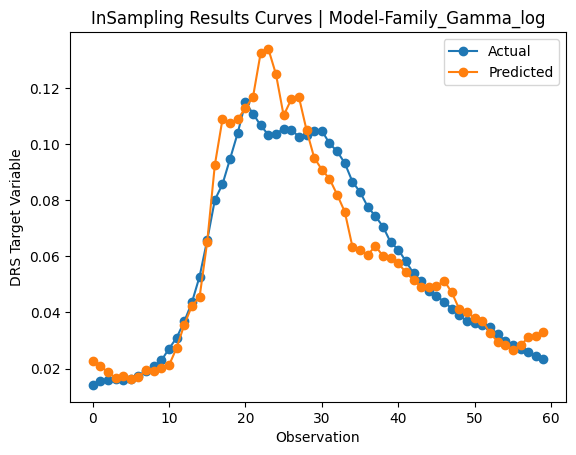

Family_Gaussian_identity
MSE: 3.368882881928603e-05
RMSE: 0.0058042078545901534
MAE 0.004759219320465291


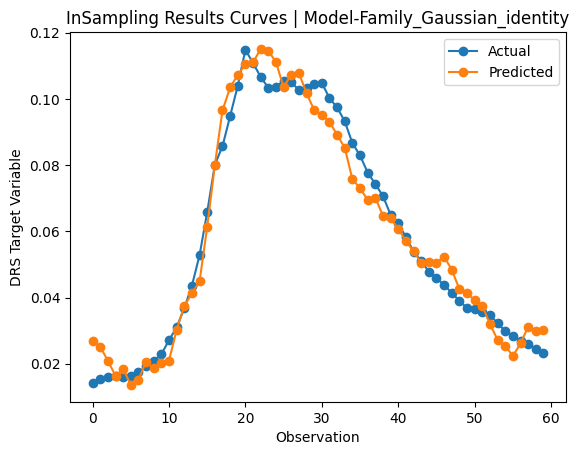

Family_Tweedie_log
MSE: 8.003413189558557e-05
RMSE: 0.008946179737496087
MAE 0.006740172109786416


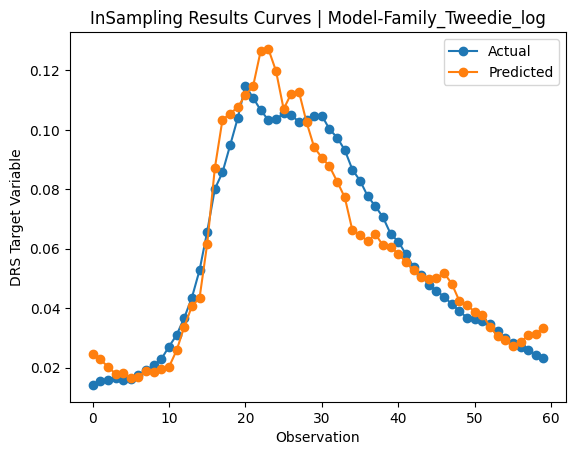

Family_Bionomail_logit
MSE: 6.148077868889466e-05
RMSE: 0.007840967968873146
MAE 0.006219299311077302


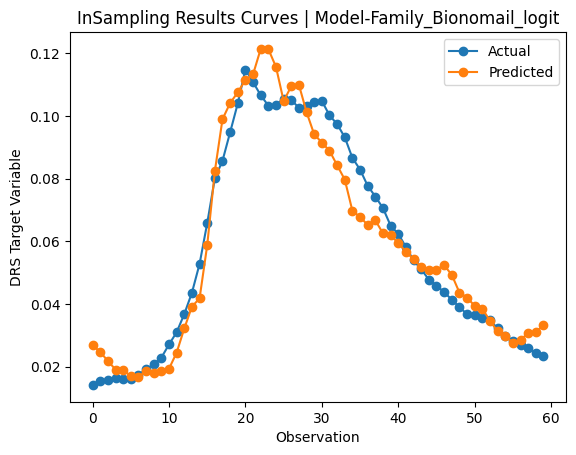

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
currents_models = [(result_1 ,'Family_Gamma_log' ) , 
                   (result_2 ,'Family_Gaussian_identity') , 
                   (result_3 ,'Family_Tweedie_log') , 
                   (result_4 ,'Family_Bionomail_logit') 
                   ]

# Define the predictors and response variable
predictors = ['Prime rate', 'Unemployment rate_lag_1', 'House Price Index (Level)_YOY','Mortgage rate']
response = 'DRS-Target Variable'
for model_fitted_instance in currents_models:
    model = model_fitted_instance[0]
    model_name = model_fitted_instance[1]
    print(model_name)

    results_df = pd.DataFrame()
    results_df['Predicted'] = model.predict(sm.add_constant(training_data[predictors])).tolist()
    results_df['Actual']  = training_data[response].tolist()
    # Calculate MSE
    mse = mean_squared_error(results_df['Predicted'], results_df['Actual'])
    mae = mean_absolute_error(results_df['Predicted'], results_df['Actual'])
    # Calculate RMSE
    rmse = np.sqrt(mse)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print('MAE',mae)
    plt.plot(results_df.index, results_df['Actual'], label='Actual',marker='o')
    plt.plot(results_df.index, results_df['Predicted'], label='Predicted',marker='o')
    plt.xlabel('Observation')
    plt.ylabel('DRS Target Variable')
    plt.title(f'InSampling Results Curves | Model-{model_name}')
    plt.legend()
    plt.show() 

### Using Model-1

MSE: 0.00010658980347289853
RMSE: 0.010324233795923964
MAE 0.007341419149024233


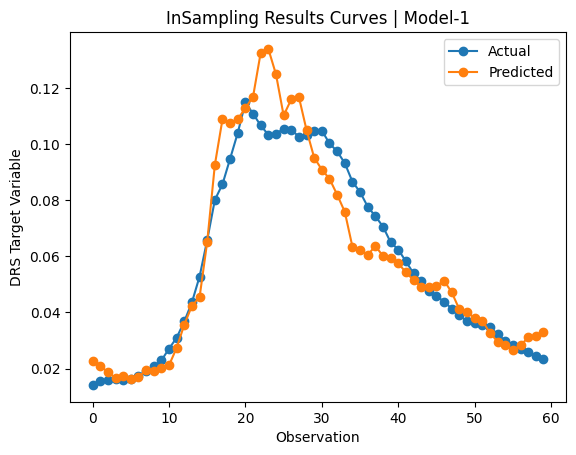

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Define the predictors and response variable
predictors = ['Prime rate', 'Unemployment rate_lag_1', 'House Price Index (Level)_YOY','Mortgage rate']
response = 'DRS-Target Variable'

results_df_model_1 = pd.DataFrame()

results_df_model_1['Predicted'] = result_1.predict(sm.add_constant(training_data[predictors])).tolist()
results_df_model_1['Actual']  = training_data[response].tolist()


# Calculate MSE
mse = mean_squared_error(results_df_model_1['Predicted'], results_df_model_1['Actual'])
mae = mean_absolute_error(results_df_model_1['Predicted'], results_df_model_1['Actual'])
# Calculate RMSE
rmse = np.sqrt(mse) 

print("MSE:", mse)
print("RMSE:", rmse)
print('MAE',mae)
plt.plot(results_df_model_1.index, results_df_model_1['Actual'], label='Actual',marker='o')
plt.plot(results_df_model_1.index, results_df_model_1['Predicted'], label='Predicted',marker='o')
plt.xlabel('Observation')
plt.ylabel('DRS Target Variable')
plt.title('InSampling Results Curves | Model-1')
plt.legend()
plt.show()


### Using Model-2

MSE: 3.368882881928603e-05
RMSE: 0.0058042078545901534
MAE 0.004759219320465291


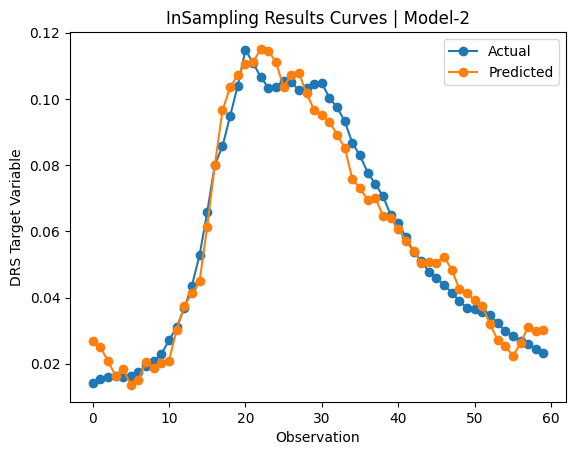

In [46]:
from sklearn.metrics import mean_squared_error

# Define the predictors and response variable
predictors = ['Prime rate', 'Unemployment rate_lag_1', 'House Price Index (Level)_YOY','Mortgage rate']
response = 'DRS-Target Variable'

results_df_model_2 = pd.DataFrame()

results_df_model_2['Predicted'] = result_2.predict(sm.add_constant(training_data[predictors])).tolist()
results_df_model_2['Actual']  = training_data[response].tolist()


# Calculate MSE
mse = mean_squared_error(results_df_model_2['Predicted'], results_df_model_2['Actual'])
mae = mean_absolute_error(results_df_model_2['Predicted'], results_df_model_2['Actual'])

# Calculate RMSE
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)
print('MAE',mae)

plt.plot(results_df_model_2.index, results_df_model_2['Actual'], label='Actual',marker='o')
plt.plot(results_df_model_2.index, results_df_model_2['Predicted'], label='Predicted',marker='o')
plt.xlabel('Observation')
plt.ylabel('DRS Target Variable')
plt.title('InSampling Results Curves | Model-2')
plt.legend()
plt.show()


### Using Model-3

MSE: 8.003413189558557e-05
RMSE: 0.008946179737496087
MAE 0.006740172109786416


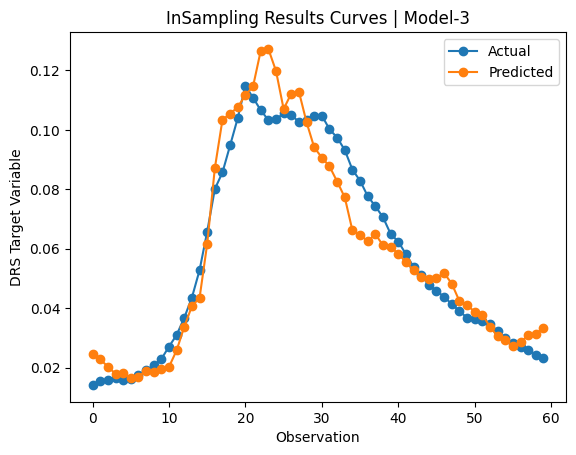

In [47]:
from sklearn.metrics import mean_squared_error

# Define the predictors and response variable
predictors = ['Prime rate', 'Unemployment rate_lag_1', 'House Price Index (Level)_YOY','Mortgage rate']
response = 'DRS-Target Variable'

results_df_model_3 = pd.DataFrame()

results_df_model_3['Predicted'] = result_3.predict(sm.add_constant(training_data[predictors])).tolist()
results_df_model_3['Actual']  = training_data[response].tolist()


# Calculate MSE
mse = mean_squared_error(results_df_model_3['Predicted'], results_df_model_3['Actual'])
mae = mean_absolute_error(results_df_model_3['Predicted'], results_df_model_3['Actual'])

# Calculate RMSE
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)
print('MAE',mae)

plt.plot(results_df_model_3.index, results_df_model_3['Actual'], label='Actual',marker='o')
plt.plot(results_df_model_3.index, results_df_model_3['Predicted'], label='Predicted',marker='o')
plt.xlabel('Observation')
plt.ylabel('DRS Target Variable')
plt.title('InSampling Results Curves | Model-3')
plt.legend()
plt.show()


# Using Model-4

MSE: 6.148077868889466e-05
RMSE: 0.007840967968873146
MAE 0.006219299311077302


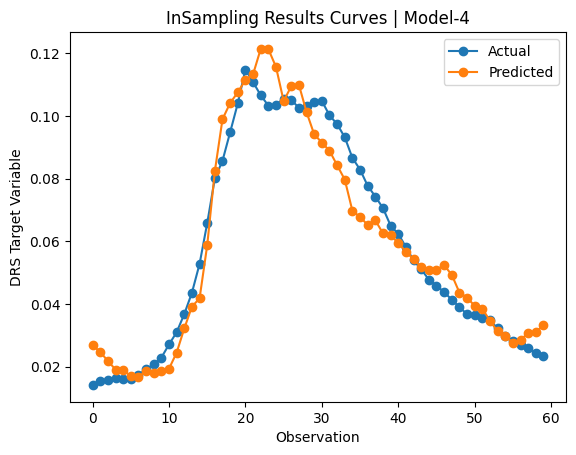

In [48]:
from sklearn.metrics import mean_squared_error

# Define the predictors and response variable
predictors = ['Prime rate', 'Unemployment rate_lag_1', 'House Price Index (Level)_YOY','Mortgage rate']
response = 'DRS-Target Variable'

results_df_model_4 = pd.DataFrame()

results_df_model_4['Predicted'] = result_4.predict(sm.add_constant(training_data[predictors])).tolist()
results_df_model_4['Actual']  = training_data[response].tolist()


# Calculate MSE
mse = mean_squared_error(results_df_model_4['Predicted'], results_df_model_4['Actual'])
mae = mean_absolute_error(results_df_model_4['Predicted'], results_df_model_4['Actual'])

# Calculate RMSE
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)
print('MAE',mae)

plt.plot(results_df_model_4.index, results_df_model_4['Actual'], label='Actual',marker='o')
plt.plot(results_df_model_4.index, results_df_model_4['Predicted'], label='Predicted',marker='o')
plt.xlabel('Observation')
plt.ylabel('DRS Target Variable')
plt.title('InSampling Results Curves | Model-4')
plt.legend()
plt.show()


# Using Model-4

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Define the predictors and response variable
predictors = ['Prime rate', 'Unemployment rate_lag_1', 'House Price Index (Level)_YOY']
response = 'DRS-Target Variable'
results_df = pd.DataFrame()

results_df['Predicted'] = result_4.predict(sm.add_constant(testing_data[predictors])).tolist()
results_df['Actual']  = testing_data[response].tolist()


# Calculate MSE
mse = mean_squared_error(results_df['Predicted'], results_df['Actual'])
mae = mean_absolute_error(results_df['Predicted'], results_df['Actual'])

# Calculate RMSE
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

plt.plot(results_df.index, results_df['Actual'], label='Actual',marker='o')
plt.plot(results_df.index, results_df['Predicted'], label='Predicted',marker='o')
plt.xlabel('Observation')
plt.ylabel('DRS Target Variable')
plt.title('Out-Sampling Results Curves')
plt.legend()
plt.show()


ValueError: shapes (8,4) and (5,) not aligned: 4 (dim 1) != 5 (dim 0)

# Instruction for conveting html or PDF

In [65]:
# step 1 : jupyter nbconvert --to html --execute filename.ipynb # it will html file including outputs
# step 2 : Then you convert it to PDF by ctrl+P